In [2]:
# Multiple regression with data processing
import pandas as pd
import matplotlib as plot
import seaborn as sb
# groupby is used for grouping the date.
#drop is used to delete a particular column and row
# hue parameter is for grouping the variable that produces points with
# different colours
# get_dummies is used for data manipulation
ds = sb.load_dataset('tips')
ds.head(8)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4


In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [4]:
ds.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
ds.groupby('day').count()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Thur,62,62,62,62,62,62
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76


In [8]:
ds2 = ds.groupby('day').sum()
ds2.head(8)

,total_bill,tip,size
day,,,
Thur,1096.33,171.83,152
Fri,325.88,51.96,40
Sat,1778.40,260.40,219
Sun,1627.16,247.39,216


In [9]:
ds2.drop('size',inplace=True,axis=1)
ds2.head(7)


,total_bill,tip
day,,
Thur,1096.33,171.83
Fri,325.88,51.96
Sat,1778.40,260.40
Sun,1627.16,247.39


In [10]:
ds2['percent'] = ds2['tip']/ds2['total_bill']*100
ds2.head(9)

,total_bill,tip,percent
day,,,
Thur,1096.33,171.83,15.673201
Fri,325.88,51.96,15.944519
Sat,1778.40,260.40,14.642375
Sun,1627.16,247.39,15.203791


In [12]:
ds3 = ds.groupby('smoker').sum()
ds3

,total_bill,tip,size
smoker,,,
Yes,1930.34,279.81,224
No,2897.43,451.77,403


In [13]:
ds3['percent'] = ds3['tip']/ds3['total_bill']*100
ds3

,total_bill,tip,size,percent
smoker,,,,
Yes,1930.34,279.81,224,14.495374
No,2897.43,451.77,403,15.592094


In [14]:
ds4 = ds.groupby(['day','size']).sum()
ds4.head(6)

total_bill     tip
day  size                    
Thur 1          10.07    1.83
     2         727.53  117.24
     3          76.64   10.77
     4         149.75   21.09
     5          41.19    5.00
     6          91.15   15.90

In [16]:
ds4['percent']=ds4['tip']/ds4['total_bill']*100
ds4.head(7)

total_bill     tip    percent
day  size                               
Thur 1          10.07    1.83  18.172790
     2         727.53  117.24  16.114799
     3          76.64   10.77  14.052714
     4         149.75   21.09  14.083472
     5          41.19    5.00  12.138869
     6          91.15   15.90  17.443774
Fri  1           8.58    1.92  22.377622

<AxesSubplot:xlabel='total_bill', ylabel='count'>

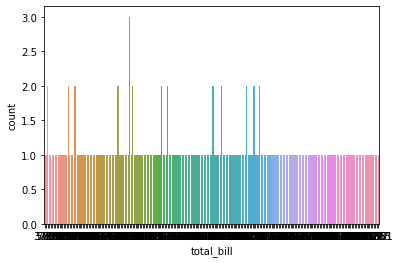

In [37]:
sb.countplot(x='total_bill',data=ds)


<AxesSubplot:xlabel='day', ylabel='count'>

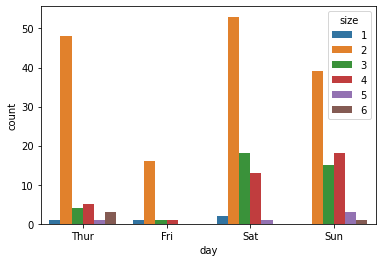

In [18]:
sb.countplot(x='day',hue= 'size',data=ds)

<AxesSubplot:xlabel='day', ylabel='count'>

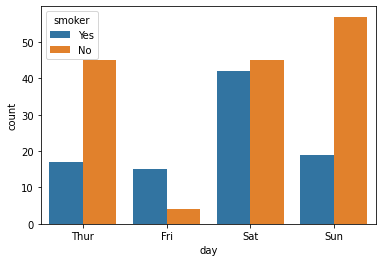

In [19]:
sb.countplot(x='day',hue= 'smoker',data=ds)

In [21]:
ds.replace({'sex':{'Male':0,'Female':1},'smoker':{'No':0,'Yes':1}})
ds.head(7)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2


In [22]:
days =pd.get_dummies(ds['day'])
days.sample(6)

,Thur,Fri,Sat,Sun
192,1,0,0,0
88,1,0,0,0
115,0,0,0,1
99,0,1,0,0
188,0,0,0,1
216,0,0,1,0


In [24]:
days = pd.get_dummies(ds['day'],drop_first=True)
days.head(8)

,Fri,Sat,Sun
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1


In [26]:
ds=pd.concat([ds,days],axis=1)
ds.head(7)


,total_bill,tip,sex,smoker,day,time,size,Fri,Sat,Sun
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0,1
5,25.29,4.71,Male,No,Sun,Dinner,4,0,0,1
6,8.77,2.00,Male,No,Sun,Dinner,2,0,0,1


In [27]:
time = pd.get_dummies(ds['time'],drop_first=True)
ds = pd.concat([ds,time],axis=1)
ds.head(6)

,total_bill,tip,sex,smoker,day,time,size,Fri,Sat,Sun,Dinner
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0,1,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0,0,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,0,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,0,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0,1,1
5,25.29,4.71,Male,No,Sun,Dinner,4,0,0,1,1


In [28]:
ds.drop(['day','time'],inplace=True,axis=1)
ds.head(8)

,total_bill,tip,sex,smoker,size,Fri,Sat,Sun,Dinner
0,16.99,1.01,Female,No,2,0,0,1,1
1,10.34,1.66,Male,No,3,0,0,1,1
2,21.01,3.50,Male,No,3,0,0,1,1
3,23.68,3.31,Male,No,2,0,0,1,1
4,24.59,3.61,Female,No,4,0,0,1,1
5,25.29,4.71,Male,No,4,0,0,1,1
6,8.77,2.00,Male,No,2,0,0,1,1
7,26.88,3.12,Male,No,4,0,0,1,1


In [3]:
ds = sb.load_dataset('tips')
ds.head(8)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4


In [4]:
time = pd.get_dummies(ds['time'],drop_first=True)
ds = pd.concat([ds,time],axis=1)
ds.head(6)

,total_bill,tip,sex,smoker,day,time,size,Dinner
0,16.99,1.01,Female,No,Sun,Dinner,2,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1
5,25.29,4.71,Male,No,Sun,Dinner,4,1
